$$\textbf{Taller 4} \\ \textbf{Natali André Julio Beltran - 1098807231}\\ \textbf{Brayan Alejandro Murillo González - 1007338060}$$

In [251]:
import math as m
import numpy as np
import matplotlib as plt
from pylab import *
import scipy as sp
from scipy import optimize
import pandas as pd



PUNTO 1

$$e^{x}-2=cos(e^{x}-2)$$

$$f(x)=e^{x}-2-cos(e^{x}-2)$$

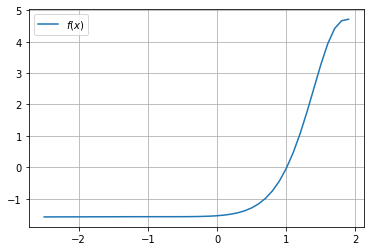

In [252]:
""" Se definen la función f(x) a partir de la ecuacion dada"""

def f(x):
  f=np.exp(x)-2-np.cos(np.exp(x)-2)
  return f 

""" Se define la derivada de la función anterior para utilizar el metodo de la secante"""  
def fpr(x):
  return np.exp(x)+np.sin(np.exp(x)-2)*np.exp(x)
  


""" Se crea un arreglo para x y se evalua en f(x) para graficar"""  
x=np.arange(-2.5,2,0.1) # Valores de x entre -2.5 < x < 0.1 para graficar

plot(x,f(x),label="$f(x)$")
plt.grid()
plt.legend()



In [253]:
root1=optimize.newton(f,0.5)          # Raiz por metodo de Newton
root2=optimize.newton(f,0.5,fpr)        # Raiz por metodo de secante  
root3=optimize.bisect(f,0.5,3)        # Raiz por metodo de biseccion 
root4=optimize.fixed_point(f,1.05)     # Raiz por metodo de punto fijo


""" Se crea un dataframe con las raices obtenidas con los distintos metodos para comparar """

df=pd.DataFrame()
df["Método"]=["Newton","Secant","Bisección","Punto fijo"]
df["Raíz"]=[root1,root2,root3,root4]

df
""" Se observa que el unico valor distinto para la raiz es el obtenido con el metodo de punto fijo """

' Se observa que el unico valor distinto para la raiz es el obtenido con el metodo de punto fijo '

PUNTO 2 

$$ x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t \ \ \ \ (1)$$

cuando $$x(1)=0.51$$ 



$$f(w) = 2\omega^2\  0.51\sin\omega  \ + \ g \ sinh (\omega)   $$

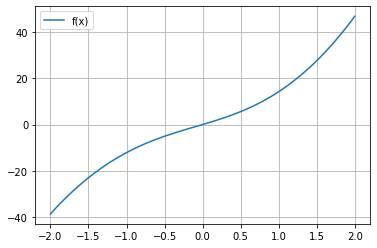

In [254]:

""" Se remplazan los valores de x=0.51 t=1 en la ecuacion uno, se iguala a cero y se construye la funcion """

def f(w):
  f=(2*w**2)*(0.51+np.sin(w))+g*np.sinh(w)
  return (f)

g=9.76 # Valor de la gravedad

""" Se grafica la funcion para tener una idea de en que punto se encuentra la raiz """
x = np.linspace(-2, 2, 100) # Valores de x entre -2 < x < 2 para graficar

plt.plot(x, f(x), label="f(x)")
plt.grid()
plt.legend()




In [255]:
""" Calculo de la raiz por el metodo de Newton-Raphson  """

root=optimize.newton(f,-0.5)
print("La velocidad con la que cambia el ángulo es aproximadamente: %f°" %(root))



""" El angulo es constante, cambia a una velocidad de aproximadamente 0° por segundo """

La velocidad con la que cambia el ángulo es aproximadamente: -0.000000°


' El angulo es constante, cambia a una velocidad de aproximadamente 0° por segundo '

PUNTO 3

$$V=L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)$$

$$ L=10, \ V=12.4,\ r=1  $$

$$ f(h)=5 \pi-10\ arcsin(h)-10h(1-h^2)^\frac{1}{2}-12.4=0$$

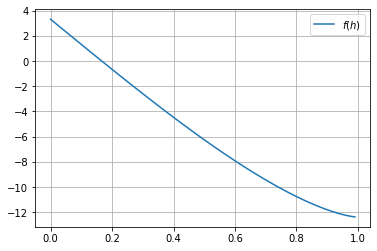

In [256]:

"""" Se define la función f(h) a partir de la ecuacion dada para el volumen remplazando los valores de L,V,r dados en el problema"""

def f(h):
  return 5*np.pi-10*np.arcsin(h)-(10*h*(1-h**2)**(1/2))-12.4
  
""" Se grafica la funcion para tener una idea de en que punto se encuentra la raiz """
h=np.arange(0,1,0.01)

plot(h,f(h), label="$f(h)$")
plt.grid()
plt.legend()

In [257]:
""" Calculo de la raiz por el metodo de Newton-Raphson  """

h1=optimize.newton(f,0.2)

print("La profundidad del agua para L=10[ft], r=1[ft], V=12.4[ft] es de: %f[ft] " %(1-h1)) 

La profundidad del agua para L=10[ft], r=1[ft], V=12.4[ft] es de: 0.833834[ft] 


PUNTO 3

$$A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0\ \ \ \ (1)$$ 



donde; 
$$
A = l \sin(\beta)
\$$

$$
B = l \cos(\beta)
$$
$$
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
$$
$$
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
$$


Para los valores $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo $ \alpha$ se aproximara a 33

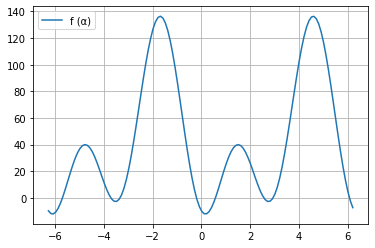

In [258]:
""" Definimos cada uno de los coeficientes A,B,C,E para construir la funcion que dependa unicamente de alpha """
l,h,D,beta=89,49,55,11.5
l=89
h=49
D=55
beta= np.radians(11.5) # El angulo beta dado se convierte a radianes

A=l*np.sin(beta)
B=l*np.cos(beta)
C=(h+0.5*D)*np.sin(beta)-0.5*D*(np.tan(beta))
E=(h+0.5*D)*np.cos(beta)-0.5*D

""" Una vez establecidos los coeficientes de la ecuación (1) se define dentro de python como una funcion de α"""
def f(α):
  return A*np.sin(α)*np.cos(α)+B*((np.sin(α))**2)-C*np.cos(α)-E*np.sin(α)
  
""" Graficamos la funcion"""
α=np.arange(-2*np.pi,2*np.pi,0.1) # Valores de α entre -2π < α < 2π para graficar
y=f(α)

plot(α,y,label="f (α)")
plt.grid()
plt.legend()


In [259]:

""" Calculo de la raiz por el metodo de Newton-Raphson  """

alpha1=optimize.newton(f,1)         # Angulo en radianes obtenido con el metodo de newton

print("El angulo alpha es de aproximadamente: ",(np.degrees(alpha1)))

El angulo alpha es de aproximadamente:  32.9721748224196
